# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
0.01896541960606335


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 4.090897e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.017143645815455306


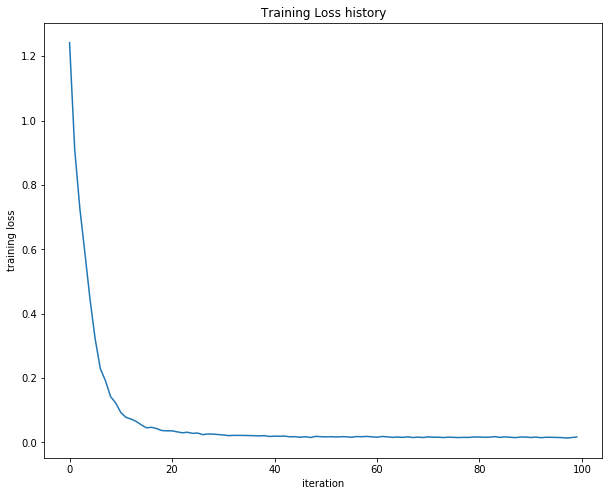

In [8]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [9]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



iteration 0 / 1000: loss 2.302762
iteration 100 / 1000: loss 2.302358
iteration 200 / 1000: loss 2.297405
iteration 300 / 1000: loss 2.258897
iteration 400 / 1000: loss 2.202976
iteration 500 / 1000: loss 2.116818
iteration 600 / 1000: loss 2.049801
iteration 700 / 1000: loss 1.985725
iteration 800 / 1000: loss 2.003727
iteration 900 / 1000: loss 1.948067
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

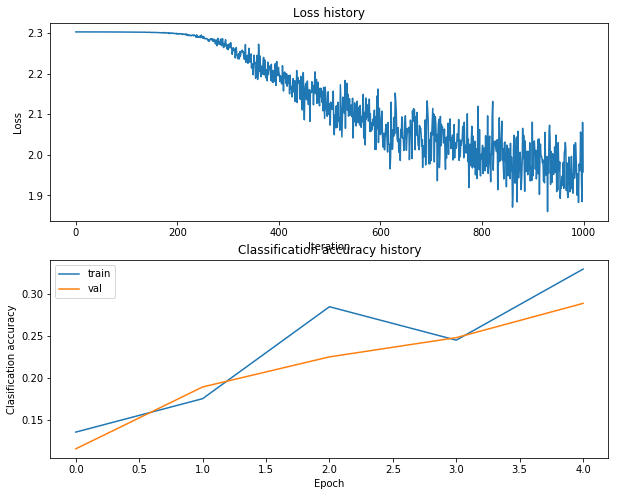

In [11]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

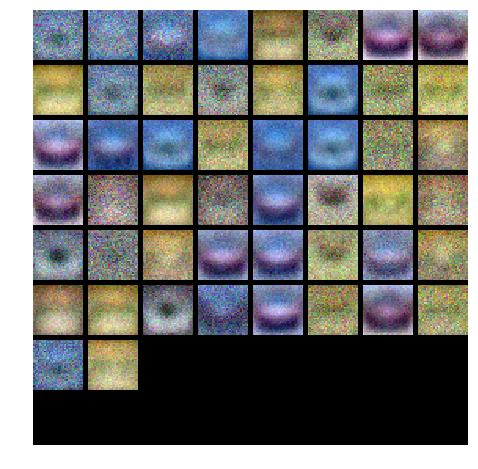

In [12]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [25]:
best_net = None # store the best model into this 
results={}
best_val=0
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

hidden_size_list = [50,55,60,65,70]
learning_rate_list=[3e-4,5e-4,7e-4]
num_iters_list=[1200,1400,1600]
reg_list=[0.15,0.2,0.25]
for i in range(len(hidden_size_list)):
    for j in range(len(learning_rate_list)):
        for k in range(len(num_iters_list)):
            for m in range(len(reg_list)):
                hidden_size=hidden_size_list[i]
                learning_rate=learning_rate_list[j]
                num_iters=num_iters_list[k]
                reg=reg_list[m]
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                stats = net.train(X_train, y_train, X_val, y_val,
                learning_rate=learning_rate, reg=reg, num_iters=num_iters, learning_rate_decay=0.95,
                batch_size=200,verbose=True)
                val_acc = (net.predict(X_val) == y_val).mean()
                results[(hidden_size,learning_rate,num_iters,reg)]=val_acc
                if(best_val<val_acc):
                  best_val=val_acc
                  best_net=net

for hidden_size,learning_rate,num_iters,reg in sorted(results):
    val_accuracy = results[(hidden_size,learning_rate,num_iters,reg)]
    print('hid %e lr %e ni %e reg %e valacc: %f' % (
               hidden_size,learning_rate,num_iters,reg,val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
#the best parameters are the last loop#
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 1200: loss 2.302673
iteration 100 / 1200: loss 2.274505
iteration 200 / 1200: loss 2.011542
iteration 300 / 1200: loss 1.996970
iteration 400 / 1200: loss 1.865517
iteration 500 / 1200: loss 2.039804
iteration 600 / 1200: loss 1.913727
iteration 700 / 1200: loss 1.781544
iteration 800 / 1200: loss 1.792034
iteration 900 / 1200: loss 1.615801
iteration 1000 / 1200: loss 1.744882
iteration 1100 / 1200: loss 1.705074
iteration 0 / 1200: loss 2.302715
iteration 100 / 1200: loss 2.248310
iteration 200 / 1200: loss 2.133145
iteration 300 / 1200: loss 1.975943
iteration 400 / 1200: loss 1.824025
iteration 500 / 1200: loss 1.812372
iteration 600 / 1200: loss 1.786331
iteration 700 / 1200: loss 1.762595
iteration 800 / 1200: loss 1.700290
iteration 900 / 1200: loss 1.701566
iteration 1000 / 1200: loss 1.692782
iteration 1100 / 1200: loss 1.706783
iteration 0 / 1200: loss 2.302789
iteration 100 / 1200: loss 2.257089
iteration 200 / 1200: loss 2.111543
iteration 300 / 1200: loss 1.9

iteration 700 / 1600: loss 1.673132
iteration 800 / 1600: loss 1.564606
iteration 900 / 1600: loss 1.606814
iteration 1000 / 1600: loss 1.623716
iteration 1100 / 1600: loss 1.548160
iteration 1200 / 1600: loss 1.389062
iteration 1300 / 1600: loss 1.565622
iteration 1400 / 1600: loss 1.535256
iteration 1500 / 1600: loss 1.521557
iteration 0 / 1600: loss 2.302799
iteration 100 / 1600: loss 2.191482
iteration 200 / 1600: loss 1.960924
iteration 300 / 1600: loss 1.873605
iteration 400 / 1600: loss 1.728458
iteration 500 / 1600: loss 1.655654
iteration 600 / 1600: loss 1.646343
iteration 700 / 1600: loss 1.771598
iteration 800 / 1600: loss 1.600690
iteration 900 / 1600: loss 1.629388
iteration 1000 / 1600: loss 1.651891
iteration 1100 / 1600: loss 1.562680
iteration 1200 / 1600: loss 1.563370
iteration 1300 / 1600: loss 1.538079
iteration 1400 / 1600: loss 1.513685
iteration 1500 / 1600: loss 1.613600
iteration 0 / 1200: loss 2.302725
iteration 100 / 1200: loss 1.990779
iteration 200 / 1200

iteration 1200 / 1400: loss 1.623065
iteration 1300 / 1400: loss 1.675209
iteration 0 / 1600: loss 2.302684
iteration 100 / 1600: loss 2.254986
iteration 200 / 1600: loss 2.019816
iteration 300 / 1600: loss 1.937222
iteration 400 / 1600: loss 1.843303
iteration 500 / 1600: loss 1.891326
iteration 600 / 1600: loss 1.739620
iteration 700 / 1600: loss 1.813775
iteration 800 / 1600: loss 1.672319
iteration 900 / 1600: loss 1.752686
iteration 1000 / 1600: loss 1.706882
iteration 1100 / 1600: loss 1.656007
iteration 1200 / 1600: loss 1.643783
iteration 1300 / 1600: loss 1.510334
iteration 1400 / 1600: loss 1.476544
iteration 1500 / 1600: loss 1.477735
iteration 0 / 1600: loss 2.302782
iteration 100 / 1600: loss 2.274692
iteration 200 / 1600: loss 2.120882
iteration 300 / 1600: loss 1.947926
iteration 400 / 1600: loss 1.852682
iteration 500 / 1600: loss 1.870903
iteration 600 / 1600: loss 1.758505
iteration 700 / 1600: loss 1.714948
iteration 800 / 1600: loss 1.726727
iteration 900 / 1600: lo

iteration 100 / 1400: loss 2.119972
iteration 200 / 1400: loss 1.866873
iteration 300 / 1400: loss 1.762429
iteration 400 / 1400: loss 1.690349
iteration 500 / 1400: loss 1.665781
iteration 600 / 1400: loss 1.553301
iteration 700 / 1400: loss 1.538670
iteration 800 / 1400: loss 1.622550
iteration 900 / 1400: loss 1.684715
iteration 1000 / 1400: loss 1.480926
iteration 1100 / 1400: loss 1.447702
iteration 1200 / 1400: loss 1.395169
iteration 1300 / 1400: loss 1.499418
iteration 0 / 1400: loss 2.302819
iteration 100 / 1400: loss 1.984042
iteration 200 / 1400: loss 1.840998
iteration 300 / 1400: loss 1.715362
iteration 400 / 1400: loss 1.768137
iteration 500 / 1400: loss 1.680564
iteration 600 / 1400: loss 1.662449
iteration 700 / 1400: loss 1.561060
iteration 800 / 1400: loss 1.631402
iteration 900 / 1400: loss 1.517710
iteration 1000 / 1400: loss 1.702308
iteration 1100 / 1400: loss 1.606988
iteration 1200 / 1400: loss 1.526430
iteration 1300 / 1400: loss 1.513995
iteration 0 / 1600: lo

iteration 200 / 1200: loss 1.848682
iteration 300 / 1200: loss 1.830926
iteration 400 / 1200: loss 1.756874
iteration 500 / 1200: loss 1.691986
iteration 600 / 1200: loss 1.612729
iteration 700 / 1200: loss 1.616151
iteration 800 / 1200: loss 1.538553
iteration 900 / 1200: loss 1.561678
iteration 1000 / 1200: loss 1.575325
iteration 1100 / 1200: loss 1.552767
iteration 0 / 1400: loss 2.302696
iteration 100 / 1400: loss 2.078742
iteration 200 / 1400: loss 1.896739
iteration 300 / 1400: loss 1.798421
iteration 400 / 1400: loss 1.695242
iteration 500 / 1400: loss 1.733927
iteration 600 / 1400: loss 1.622269
iteration 700 / 1400: loss 1.717861
iteration 800 / 1400: loss 1.660183
iteration 900 / 1400: loss 1.559875
iteration 1000 / 1400: loss 1.557902
iteration 1100 / 1400: loss 1.621855
iteration 1200 / 1400: loss 1.424809
iteration 1300 / 1400: loss 1.463388
iteration 0 / 1400: loss 2.302746
iteration 100 / 1400: loss 2.052038
iteration 200 / 1400: loss 1.963297
iteration 300 / 1400: loss

iteration 100 / 1200: loss 2.268864
iteration 200 / 1200: loss 2.111535
iteration 300 / 1200: loss 2.008053
iteration 400 / 1200: loss 1.858304
iteration 500 / 1200: loss 1.876172
iteration 600 / 1200: loss 1.870054
iteration 700 / 1200: loss 1.743825
iteration 800 / 1200: loss 1.786777
iteration 900 / 1200: loss 1.796329
iteration 1000 / 1200: loss 1.687000
iteration 1100 / 1200: loss 1.679188
iteration 0 / 1200: loss 2.302767
iteration 100 / 1200: loss 2.254417
iteration 200 / 1200: loss 2.037124
iteration 300 / 1200: loss 1.987101
iteration 400 / 1200: loss 1.943183
iteration 500 / 1200: loss 1.760007
iteration 600 / 1200: loss 1.876069
iteration 700 / 1200: loss 1.764251
iteration 800 / 1200: loss 1.851283
iteration 900 / 1200: loss 1.787231
iteration 1000 / 1200: loss 1.686333
iteration 1100 / 1200: loss 1.712857
iteration 0 / 1200: loss 2.302838
iteration 100 / 1200: loss 2.224589
iteration 200 / 1200: loss 2.085795
iteration 300 / 1200: loss 1.932079
iteration 400 / 1200: loss 1

iteration 800 / 1600: loss 1.668037
iteration 900 / 1600: loss 1.597301
iteration 1000 / 1600: loss 1.515585
iteration 1100 / 1600: loss 1.528236
iteration 1200 / 1600: loss 1.527988
iteration 1300 / 1600: loss 1.512714
iteration 1400 / 1600: loss 1.504266
iteration 1500 / 1600: loss 1.384268
iteration 0 / 1600: loss 2.302850
iteration 100 / 1600: loss 2.140270
iteration 200 / 1600: loss 1.878045
iteration 300 / 1600: loss 1.729666
iteration 400 / 1600: loss 1.752295
iteration 500 / 1600: loss 1.703624
iteration 600 / 1600: loss 1.612423
iteration 700 / 1600: loss 1.552005
iteration 800 / 1600: loss 1.660249
iteration 900 / 1600: loss 1.614894
iteration 1000 / 1600: loss 1.563427
iteration 1100 / 1600: loss 1.566774
iteration 1200 / 1600: loss 1.485245
iteration 1300 / 1600: loss 1.557247
iteration 1400 / 1600: loss 1.494732
iteration 1500 / 1600: loss 1.546332
iteration 0 / 1200: loss 2.302725
iteration 100 / 1200: loss 2.017187
iteration 200 / 1200: loss 1.871114
iteration 300 / 1200

iteration 1300 / 1400: loss 1.653011
iteration 0 / 1600: loss 2.302741
iteration 100 / 1600: loss 2.257492
iteration 200 / 1600: loss 2.088839
iteration 300 / 1600: loss 2.007607
iteration 400 / 1600: loss 1.806235
iteration 500 / 1600: loss 1.876649
iteration 600 / 1600: loss 1.783086
iteration 700 / 1600: loss 1.823656
iteration 800 / 1600: loss 1.754609
iteration 900 / 1600: loss 1.688130
iteration 1000 / 1600: loss 1.708553
iteration 1100 / 1600: loss 1.559359
iteration 1200 / 1600: loss 1.689702
iteration 1300 / 1600: loss 1.745707
iteration 1400 / 1600: loss 1.548713
iteration 1500 / 1600: loss 1.532204
iteration 0 / 1600: loss 2.302800
iteration 100 / 1600: loss 2.251984
iteration 200 / 1600: loss 2.075379
iteration 300 / 1600: loss 1.998934
iteration 400 / 1600: loss 1.910968
iteration 500 / 1600: loss 1.816227
iteration 600 / 1600: loss 1.825310
iteration 700 / 1600: loss 1.855523
iteration 800 / 1600: loss 1.673725
iteration 900 / 1600: loss 1.697607
iteration 1000 / 1600: lo

iteration 200 / 1400: loss 1.881903
iteration 300 / 1400: loss 1.774182
iteration 400 / 1400: loss 1.691007
iteration 500 / 1400: loss 1.551850
iteration 600 / 1400: loss 1.573386
iteration 700 / 1400: loss 1.493555
iteration 800 / 1400: loss 1.582119
iteration 900 / 1400: loss 1.614616
iteration 1000 / 1400: loss 1.518550
iteration 1100 / 1400: loss 1.404520
iteration 1200 / 1400: loss 1.456629
iteration 1300 / 1400: loss 1.464017
iteration 0 / 1400: loss 2.302856
iteration 100 / 1400: loss 2.107819
iteration 200 / 1400: loss 1.806443
iteration 300 / 1400: loss 1.701242
iteration 400 / 1400: loss 1.716817
iteration 500 / 1400: loss 1.716524
iteration 600 / 1400: loss 1.690294
iteration 700 / 1400: loss 1.660414
iteration 800 / 1400: loss 1.621326
iteration 900 / 1400: loss 1.480664
iteration 1000 / 1400: loss 1.534239
iteration 1100 / 1400: loss 1.364881
iteration 1200 / 1400: loss 1.529825
iteration 1300 / 1400: loss 1.470483
iteration 0 / 1600: loss 2.302729
iteration 100 / 1600: lo

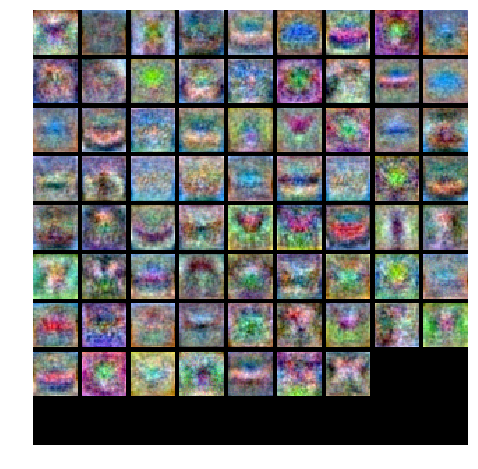

In [26]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [27]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.489


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.
1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

*Your answer*:*3*

*Your explanation:the difference results from overfitting which can be relieved by increasing reg to add penalty on weights*